# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# np.random.seed(1234)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
url = "http://api.openweathermap.org/data/2.5/weather?"

        

In [41]:

town_df = pd.DataFrame({"City": cities})
town_df['Lat']=''
town_df['Lng']=''
town_df['Max Temp']=''
town_df['Humidity']=''
town_df['Cloudiness']=''
town_df['Wind Speed']=''
town_df['Country']=''
town_df['Date']=''

# See JSON format
city = "severo-kurilsk"
query_url = url + "appid=" + weather_api_key + "&q=" + city
weather_json = requests.get(query_url).json()
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 91},
 'cod': 200,
 'coord': {'lat': 50.68, 'lon': 156.12},
 'dt': 1593537212,
 'id': 2121385,
 'main': {'feels_like': 274.74,
          'grnd_level': 1006,
          'humidity': 88,
          'pressure': 1007,
          'sea_level': 1007,
          'temp': 281.12,
          'temp_max': 281.12,
          'temp_min': 281.12},
 'name': "Severo-Kuril'sk",
 'sys': {'country': 'RU', 'sunrise': 1593538014, 'sunset': 1593597091},
 'timezone': 39600,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 293, 'speed': 7.84}}


In [43]:
# Iterate through city name


record = 1
# set_count=1

# for i, city in enumerat(cities):
#     if (i % 50 ==0 and i>= 50):
#         set_count +=1
#         record = 0

for index, row in cities_df.iterrows():      
    # get city through DF
    city = row["City"]
    # build query url and make API request to extract results
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    weather_json = requests.get(query_url).json()
    
    try: 
        print(f"Processing record {record} of {len(cities)} | {city}")
        town_df.loc[index, 'Lat'] = weather_json['coord']['lat']
        town_df.loc[index, 'Lng'] = weather_json['coord']['lon']
        town_df.loc[index, 'Max Temp'] = weather_json['main']['temp_max']
        town_df.loc[index, 'Humidity'] = weather_json['main']['humidity']
        town_df.loc[index, 'Cloudiness'] = weather_json['clouds']['all']
        town_df.loc[index, 'Wind Speed'] = weather_json['wind']['speed']
        town_df.loc[index, 'Country'] = weather_json['sys']['country']
        town_df.loc[index, 'Date'] = weather_json['dt']
    except (KeyError, IndexError):
        print("City not found. Skipping...")
    record += 1

Processing record 1 of 627 | hilo
Processing record 2 of 627 | port lincoln
Processing record 3 of 627 | bredasdorp
Processing record 4 of 627 | barra do garcas
Processing record 5 of 627 | ushuaia
Processing record 6 of 627 | hobart
Processing record 7 of 627 | esperance
Processing record 8 of 627 | mataura
Processing record 9 of 627 | busselton
Processing record 10 of 627 | honningsvag
Processing record 11 of 627 | dikson
Processing record 12 of 627 | cabinda
Processing record 13 of 627 | hermanus
Processing record 14 of 627 | albany
Processing record 15 of 627 | roma
Processing record 16 of 627 | punta arenas
Processing record 17 of 627 | choma
Processing record 18 of 627 | palmer
Processing record 19 of 627 | luangwa
Processing record 20 of 627 | east london
Processing record 21 of 627 | rikitea
Processing record 22 of 627 | kudahuvadhoo
Processing record 23 of 627 | churachandpur
Processing record 24 of 627 | pevek
Processing record 25 of 627 | domna
Processing record 26 of 627 | 

Processing record 209 of 627 | honiara
Processing record 210 of 627 | astara
Processing record 211 of 627 | kikwit
Processing record 212 of 627 | khovu-aksy
Processing record 213 of 627 | killybegs
Processing record 214 of 627 | vila velha
Processing record 215 of 627 | talnakh
Processing record 216 of 627 | kambove
Processing record 217 of 627 | tavda
Processing record 218 of 627 | pareora
Processing record 219 of 627 | sao filipe
Processing record 220 of 627 | konskie
Processing record 221 of 627 | hailey
Processing record 222 of 627 | poselki
Processing record 223 of 627 | roros
Processing record 224 of 627 | kahului
Processing record 225 of 627 | grindavik
Processing record 226 of 627 | egvekinot
Processing record 227 of 627 | mehamn
Processing record 228 of 627 | alugan
Processing record 229 of 627 | puri
Processing record 230 of 627 | quatre cocos
Processing record 231 of 627 | nikel


ConnectionError: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [44]:
# Drop rows with empty strings
nan_value = float("NaN")
town_df.replace("", nan_value, inplace=True)
town_df.dropna(how = 'any',inplace = True)

# Reset index
# town_df.reset_index(inplace = True) 

#Del extra columns
# del town_df['level_0']
# del town_df['index']

# Display DF
town_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hilo,19.73,-155.09,73.40,73.0,90.0,4.70,US,1.593537e+09
1,port lincoln,-34.73,135.87,54.54,83.0,0.0,16.67,AU,1.593537e+09
2,bredasdorp,-34.53,20.04,55.40,87.0,9.0,3.36,ZA,1.593537e+09
3,barra do garcas,-15.89,-52.26,86.76,34.0,28.0,9.17,BR,1.593537e+09
4,ushuaia,-54.80,-68.30,30.20,80.0,40.0,3.36,AR,1.593537e+09


In [18]:
#Change date format 
def convert(n): 
    return time.strftime("%m/%d/%y", time.gmtime(n)) 

for index, row in town_df.iterrows():      
    # Get date at each row
    date = row["Date"]
    formatted_date = convert(date)
    town_df["Date"]=formatted_date

town_df['Date'].value_counts()
town_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hilo,19.73,-155.09,73.40,73.0,90.0,4.70,US,06/30/20
1,port lincoln,-34.73,135.87,55.06,85.0,0.0,14.03,AU,06/30/20
2,bredasdorp,-34.53,20.04,62.60,72.0,14.0,9.17,ZA,06/30/20
3,barra do garcas,-15.89,-52.26,83.93,36.0,46.0,8.57,BR,06/30/20
4,ushuaia,-54.80,-68.30,28.40,79.0,40.0,4.70,AR,06/30/20


In [19]:
# Export city data to CSV
town_df.to_csv(output_data_file)

In [20]:
# Count number of records in DF
town_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [45]:
town_df[cities_df.Humidity > 100]
print("There aren't any cities that have humidity > 100%.")

There aren't any cities that have humidity > 100%.


In [46]:
town_df[["Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed", "Country"]].describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000
mean,20.609304,22.258991,69.301026,69.478261,52.100870,8.483670
std,33.567938,89.850338,15.102398,20.391528,36.568016,5.894206
min,-54.800000,-179.170000,30.200000,1.000000,0.000000,0.340000
25%,-8.255000,-53.415000,58.120000,58.500000,17.000000,4.360000
50%,24.340000,26.600000,71.600000,75.000000,58.000000,6.930000
75%,50.615000,105.105000,80.600000,83.000000,89.000000,11.410000
max,78.220000,179.320000,111.130000,100.000000,100.000000,34.450000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

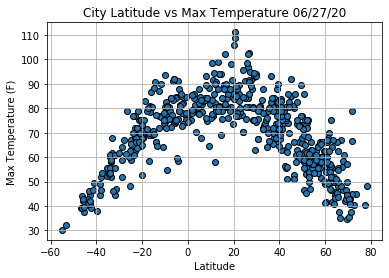

In [80]:
x_values = town_df['Lat'].astype('float')
y_values = town_df['Max Temp'].astype('float')
plt.scatter(x_values,y_values, edgecolors ='black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature 06/27/20")
plt.grid()

plt.savefig("../output_data/lat_vs_temp.png")

In [47]:

print("Max Tempature looks to increase as latitude get towards the value 0.")

Max Tempature looks to increase as latitude get towards the value 0.


## Latitude vs. Humidity Plot

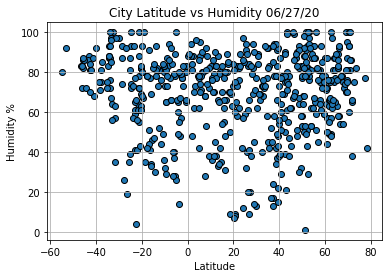

In [79]:
x_values = town_df['Lat'].astype('float')
y_values = town_df['Humidity'].astype('float')
plt.scatter(x_values,y_values, edgecolors ='black')
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("City Latitude vs Humidity 06/27/20")
plt.grid()

plt.savefig("../output_data/lat_vs_hum.png")

In [48]:
print("There is not a strong correlation between latitude and humidity.")


There is not a strong correlation between latitude and humidity.


## Latitude vs. Cloudiness Plot

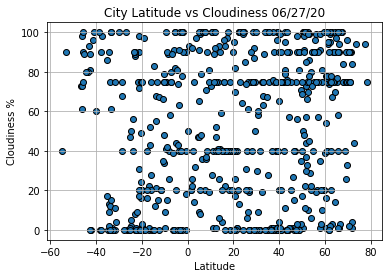

In [78]:
x_values = town_df['Lat'].astype('float')
y_values = town_df['Cloudiness'].astype('float')
plt.scatter(x_values,y_values, edgecolors ='black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("City Latitude vs Cloudiness 06/27/20")
plt.grid()

plt.savefig("../output_data/lat_vs_cloud.png")

In [28]:
print("There is not a strong correlation between latitude and cloudiness.")


There seems to be weak correlation between latitude and cloudiness.


## Latitude vs. Wind Speed Plot

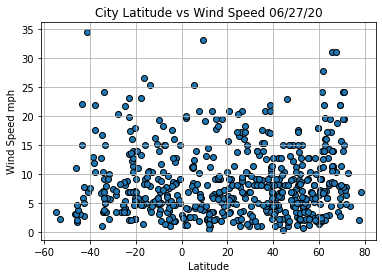

In [77]:
x_values = town_df['Lat'].astype('float')
y_values = town_df['Wind Speed'].astype('float')
plt.scatter(x_values,y_values, edgecolors ='black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed mph")
plt.title("City Latitude vs Wind Speed 06/27/20")
plt.grid()

plt.savefig("../output_data/lat_vs_wind.png")


In [50]:
print("There is not a strong correlation between latitude and wind speed.")


There is not a strong correlation between latitude and wind speed.


## Linear Regression

In [31]:
# OPTIONAL: Create a function to create Linear Regression plots

In [52]:
# Create Northern and Southern Hemisphere DataFrames
north_df = town_df.loc[town_df["Lat"] > 0,:]
south_df = town_df.loc[town_df["Lat"] < 0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.5899917698848527
There is not a strong correlation between max temperature and latitude in the northern hemisphere. 


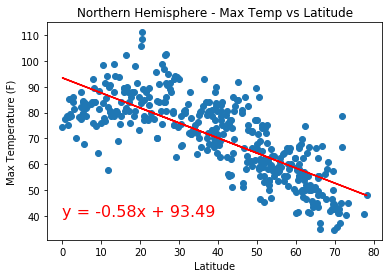

In [75]:
x_values = north_df['Lat'].astype('float')
y_values = north_df['Max Temp'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,40),fontsize=16,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - Max Temp vs Latitude")

print(f"R squared: {rvalue**2}")
print("There is not a strong correlation between max temperature and latitude in the northern hemisphere. ")

plt.savefig("../output_data/north_lat_vs_temp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.7539238927810664
There is not a strong correlation between max temperature and latitude in the southern hemisphere. 


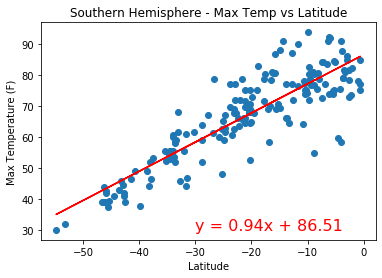

In [74]:
x_values = south_df['Lat'].astype('float')
y_values = south_df['Max Temp'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=16,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - Max Temp vs Latitude")

print(f"R squared: {rvalue**2}")
print("There is not a strong correlation between max temperature and latitude in the southern hemisphere. ")

plt.savefig("../output_data/south_lat_vs_temp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.009688104363305639
The regression modeling says that there is not a strong correlation between humidity and latitude in the northern hemisphere. 


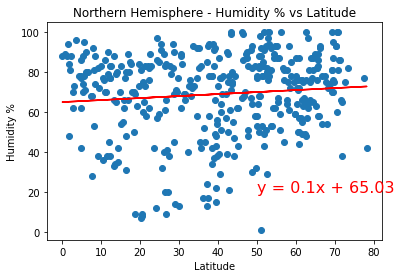

In [73]:
x_values = north_df['Lat'].astype('float')
y_values = north_df['Humidity'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=16,color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Northern Hemisphere - Humidity % vs Latitude")

print(f"R squared: {rvalue**2}")
print("The regression modeling says that there is not a strong correlation between humidity and latitude in the northern hemisphere. ")

plt.savefig("../output_data/north_lat_vs_hum.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.07806724408560667
The regression modeling says that there is not a strong correlation between humidity and latitude in the southern hemisphere. 


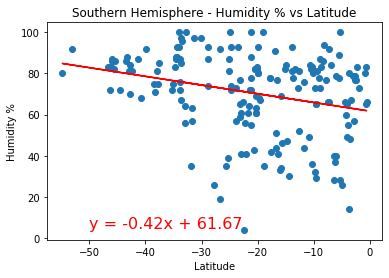

In [72]:
x_values = south_df['Lat'].astype('float')
y_values = south_df['Humidity'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,5),fontsize=16,color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Southern Hemisphere - Humidity % vs Latitude")

print(f"R squared: {rvalue**2}")
print("The regression modeling says that there is not a strong correlation between humidity and latitude in the southern hemisphere. ")

plt.savefig("../output_data/south_lat_vs_hum.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.011497728086886835
The regression modeling says that there is not a strong correlation between cloudiness and latitude in the northern hemisphere. 


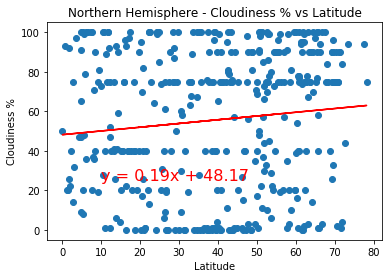

In [71]:
x_values = north_df['Lat'].astype('float')
y_values = north_df['Cloudiness'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,25),fontsize=16,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("Northern Hemisphere - Cloudiness % vs Latitude")

print(f"R squared: {rvalue**2}")
print("The regression modeling says that there is not a strong correlation between cloudiness and latitude in the northern hemisphere. ")

plt.savefig("../output_data/north_lat_vs_cloud.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.003628947311465271
The regression modeling says that there is not a strong correlation between cloudiness and latitude in the southern hemisphere. 


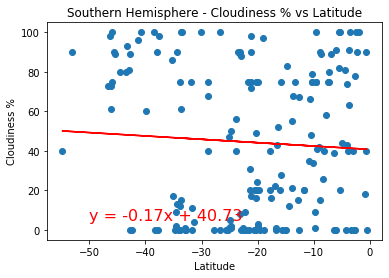

In [70]:
x_values = south_df['Lat'].astype('float')
y_values = south_df['Cloudiness'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,5),fontsize=16,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("Southern Hemisphere - Cloudiness % vs Latitude")

print(f"R squared: {rvalue**2}")
print("The regression modeling says that there is not a strong correlation between cloudiness and latitude in the southern hemisphere. ")

plt.savefig("../output_data/south_lat_vs_cloud.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.012447373822043058
The regression modeling says that there is not a strong correlation between wind speed and latitude in the northern hemisphere. 


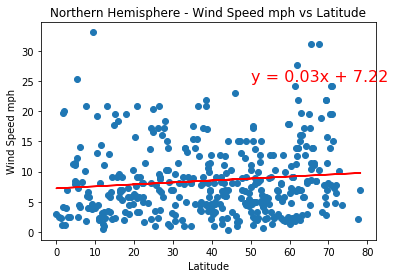

In [69]:
x_values = north_df['Lat'].astype('float')
y_values = north_df['Wind Speed'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,25),fontsize=16,color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed mph")
plt.title("Northern Hemisphere - Wind Speed mph vs Latitude")

print(f"R squared: {rvalue**2}")
print("The regression modeling says that there is not a strong correlation between wind speed and latitude in the northern hemisphere. ")

plt.savefig("../output_data/north_lat_vs_wind.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 9.078929943986539e-06
The regression modeling says that there is not a strong correlation between wind speed and latitude in the southern hemisphere. 


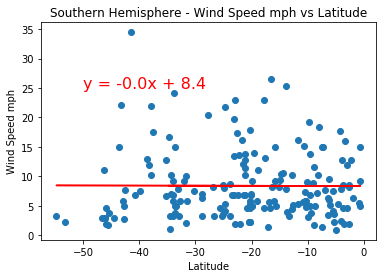

In [68]:
x_values = south_df['Lat'].astype('float')
y_values = south_df['Wind Speed'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=16,color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed mph")
plt.title("Southern Hemisphere - Wind Speed mph vs Latitude")

print(f"R squared: {rvalue**2}")
print("The regression modeling says that there is not a strong correlation between wind speed and latitude in the southern hemisphere. ")

plt.savefig("../output_data/south_lat_vs_wind.png")